# Similarity sequences analysis
--------------------------------------------------------------------------------


Author: Belén Otero Carrasco

Last updated 24 April 2024

--------------------------------------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy import stats
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import mannwhitneyu, levene
import mysql.connector
import re

C:\Users\Usuario\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Similarity by datasets

In [2]:
simi_treatvscan = pd.read_csv(("AllProteins_SimilitudTreatmentvsCancers.csv"),sep= ",")

In [3]:
simi_treat = pd.read_csv(("AllProteins_SimilitudLungCancerTreatment.csv"),sep= ",")

In [4]:
simi_full = pd.read_csv(("AllProteins_SimilitudLungCancerFullConMismaProt.csv"),sep= ",")

In [5]:
simi_dise_lung = pd.read_csv(("AllProteins_SimilitudLungCancerDisease.csv"),sep= ",")

In [6]:
simi_immune= pd.read_csv(("AllProteins_%SimilitudAutoimmuneDisease.csv"),sep= ",")

In [7]:
simi_rare = pd.read_csv(("AllProteins_%SimilitudRareDisease.csv"),sep= ",")

### Describe data 

In [8]:
simi_treatvscan.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  302224.000000  302224.000000    302224.000000      302224.000000
mean       28.813926      50.549192        36.305730          58.704623
std         8.601007      20.289527        11.544729           4.926356
min         0.454953       0.454953         0.454953          42.046609
25%        23.052097      34.778182        28.503788          55.509709
50%        30.639809      52.897196        38.699690          59.215168
75%        36.097852      68.613861        46.052632          62.269854
max        99.667406     100.000000        99.833703          99.761791

In [9]:
simi_treat.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  2652.000000    2652.000000      2652.000000        2652.000000
mean     31.351628      55.800203        39.529462          60.427545
std       9.018264      19.702628        11.532015           5.487288
min       2.589251       2.589251         2.589251          45.132024
25%      26.906158      43.053245        33.692053          57.680352
50%      32.746333      58.359436        41.711608          60.456817
75%      37.541391      73.142415        48.134328          63.578275
max      90.371457      97.182377        93.698770          96.598599

In [10]:
df_full = simi_full[simi_full['Proteina1'] != simi_full['Proteina2']]

In [11]:
df_full.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  909162.000000  909162.000000    909162.000000      909162.000000
mean       27.710122      47.830370        34.739893          57.857934
std         9.014903      20.667222        11.953857           4.856046
min         0.937175       0.937175         0.937175          42.213826
25%        21.208791      30.987395        26.030928          54.467975
50%        28.995902      48.697183        36.462729          58.269577
75%        35.392321      66.270431        44.975288          61.653818
max        99.589041      99.794521        99.589041          99.707003

In [12]:
simi_dise_lung.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  812702.000000  812702.000000    812702.000000      812702.000000
mean       27.552708      47.459438        34.520934          57.740908
std         9.069390      20.715443        12.010812           4.835662
min         0.937175       0.937175         0.937175          42.213826
25%        20.961887      30.469925        25.684394          54.330444
50%        28.792453      48.206522        36.183287          58.146147
75%        35.275623      65.932642        44.801980          61.558045
max        99.589041      99.794521        99.589041          99.707003

In [13]:
simi_immune.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  140244.000000  140244.000000    140244.000000      140244.000000
mean       29.471423      52.058989        37.194339          59.039481
std         8.173877      19.557676        10.991107           4.755932
min         1.318681       1.318681         1.318681          42.192479
25%        24.029024      37.007624        29.826863          56.054807
50%        31.414474      54.886299        39.692408          59.588976
75%        36.308204      69.353070        46.320157          62.390552
max        98.202247      99.438202        98.932584          99.176556

In [14]:
simi_rare.describe()

Similaridad  SimilaridadAA  similaridadAA_2  similaridadBlosum
count  1352.000000    1352.000000      1352.000000        1352.000000
mean     25.918008      45.042138        32.624567          57.261413
std      11.008288      23.660605        14.598808           5.929105
min       0.201422       0.201422         0.201422          43.513301
25%      19.384968      26.946498        23.630079          53.830268
50%      29.109537      48.787263        36.887019          58.286203
75%      34.752498      65.594774        44.378321          61.608040
max      41.616162      83.823529        53.482587          83.784318

### Plot similarity

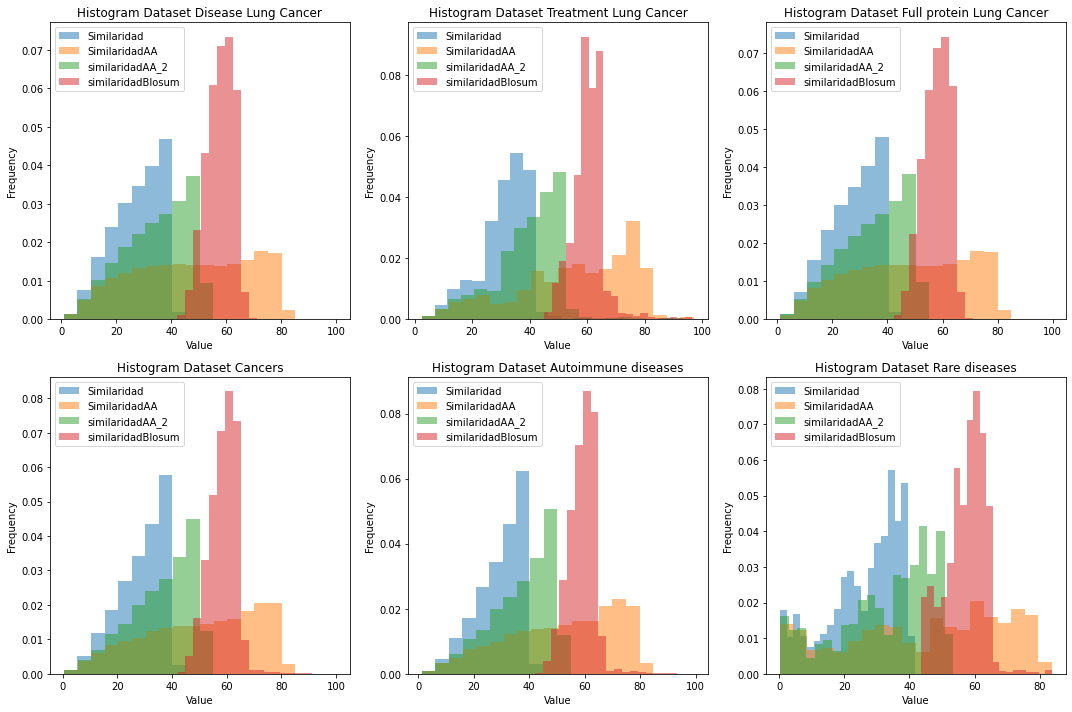

In [15]:
datasets = [simi_dise_lung,simi_treat ,df_full, simi_treatvscan, simi_immune, simi_rare]
datasets = [
    ('Disease Lung Cancer', simi_dise_lung),
    ('Treatment Lung Cancer', simi_treat),
    ('Full protein Lung Cancer', df_full),
    ('Cancers', simi_treatvscan),
    ('Autoimmune diseases', simi_immune),
    ('Rare diseases', simi_rare)
]


column_names = ['Similaridad', 'SimilaridadAA', 'similaridadAA_2', 'similaridadBlosum']


fig, axs = plt.subplots(2, 3, figsize=(15, 10))


for i, (dataset_name, dataset) in enumerate(datasets):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    ax.set_title(f'Histogram Dataset {dataset_name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    for column_name in column_names:
        ax.hist(dataset[column_name], bins=20, alpha=0.5, label=column_name, density=True)
    ax.legend()


plt.tight_layout()
plt.savefig("Histogram_six_datasets.svg")
plt.show()


### Statistics 

In [16]:
df_combined_simi = pd.concat([df_full['SimilaridadAA'], simi_dise_lung['SimilaridadAA'], simi_treat['SimilaridadAA'], simi_treatvscan['SimilaridadAA'], simi_immune['SimilaridadAA'],simi_rare['SimilaridadAA']], axis=1)

In [17]:
df_combined_simi.columns = ["full","disease","treatment","cancers","immune","rare"]

In [18]:
df_combined_simi

full    disease  treatment    cancers     immune       rare
1       47.877046  16.585582  43.165888  61.635945  29.341927  36.693548
2       16.585582  44.183989  76.708428  59.913793  12.686567  76.069519
3       44.183989  17.868200  52.044393  60.136674  29.630258  36.275626
4       17.868200  21.229544  75.934579  71.120690  15.807327  65.879828
5       21.229544  21.273773  66.939252  65.903308  26.662144  40.139949
...           ...        ...        ...        ...        ...        ...
807930        NaN   6.666667        NaN        NaN        NaN        NaN
808885        NaN  50.521921        NaN        NaN        NaN        NaN
809840        NaN   1.909059        NaN        NaN        NaN        NaN
810795        NaN  20.837209        NaN        NaN        NaN        NaN
811750        NaN  59.406566        NaN        NaN        NaN        NaN

[910013 rows x 6 columns]

In [ ]:
### check normality

In [15]:
 lilliefors(df_full['SimilaridadAA'], dist ='norm')

(0.06678582003123557, 0.0009999999999998899)

In [16]:
 lilliefors(simi_dise_lung['SimilaridadAA'], dist ='norm')

(0.0660039739215218, 0.0009999999999998899)

In [17]:
 lilliefors(simi_treat['SimilaridadAA'], dist ='norm')

(0.08928327114518153, 0.0009999999999998899)

In [18]:
 lilliefors(simi_treatvscan['SimilaridadAA'], dist ='norm')

(0.07614832209326139, 0.0009999999999998899)

In [19]:
 lilliefors(simi_immune['SimilaridadAA'], dist ='norm')

(0.08322363214534123, 0.0009999999999998899)

In [20]:
 lilliefors(simi_rare['SimilaridadAA'], dist ='norm')

(0.0908226753983673, 0.0009999999999998899)

In [21]:
### MannWhitney-U Test

In [22]:
mannwhitneyu(simi_treat['SimilaridadAA'], df_full['SimilaridadAA'])

MannwhitneyuResult(statistic=932346904.0, pvalue=6.726641267914384e-91)

In [23]:
mannwhitneyu(simi_treat['SimilaridadAA'], simi_dise_lung['SimilaridadAA'])

MannwhitneyuResult(statistic=823136118.0, pvalue=1.699618462349326e-98)

In [24]:
mannwhitneyu(simi_treat['SimilaridadAA'], simi_treatvscan['SimilaridadAA'])

MannwhitneyuResult(statistic=338897583.0, pvalue=4.640824468030087e-43)

In [25]:
mannwhitneyu(simi_treat['SimilaridadAA'], simi_immune['SimilaridadAA'])

MannwhitneyuResult(statistic=163722019.0, pvalue=2.084823990292487e-26)

In [26]:
mannwhitneyu(simi_treat['SimilaridadAA'], simi_rare['SimilaridadAA'])

MannwhitneyuResult(statistic=1323813.0, pvalue=3.652658300767717e-42)

In [27]:
### full vs cancers, immune, rare 

In [28]:
mannwhitneyu(df_full['SimilaridadAA'], simi_treatvscan['SimilaridadAA'])

MannwhitneyuResult(statistic=126867920668.0, pvalue=0.0)

In [29]:
mannwhitneyu(df_full['SimilaridadAA'], simi_immune['SimilaridadAA'])

MannwhitneyuResult(statistic=56291704649.0, pvalue=0.0)

In [30]:
mannwhitneyu(df_full['SimilaridadAA'], simi_rare['SimilaridadAA'])

MannwhitneyuResult(statistic=580959003.0, pvalue=0.0002481393097134617)

### BOXPLOT

In [19]:
treat = simi_treat['SimilaridadAA']
treat = pd.DataFrame(treat)
disease = simi_dise_lung['SimilaridadAA']
disease = pd.DataFrame(disease)
full = df_full['SimilaridadAA']
full = pd.DataFrame(full)
treatvscan = simi_treatvscan['SimilaridadAA']
treatvscan = pd.DataFrame(treatvscan)
immune = simi_immune["SimilaridadAA"]
immune = pd.DataFrame(immune)
rare = simi_rare["SimilaridadAA"]
rare = pd.DataFrame(rare)

treat["Group"] = "Treatment_lung"
disease["Group"] = "Disease_lung"
full["Group"] = "Full_protein_lung"
treatvscan["Group"] = "Cancers"
immune["Group"] = "Immune_diseases"
rare["Group"] = "Rare_diseases"

groups = pd.concat([treat,disease,full,treatvscan,immune,rare])

In [20]:
groups

SimilaridadAA           Group
0         77.649770  Treatment_lung
1         43.165888  Treatment_lung
2         76.708428  Treatment_lung
3         52.044393  Treatment_lung
4         75.934579  Treatment_lung
...             ...             ...
1347      76.469045   Rare_diseases
1348      54.313487   Rare_diseases
1349      80.619684   Rare_diseases
1350      51.913730   Rare_diseases
1351      55.832321   Rare_diseases

[2168336 rows x 2 columns]

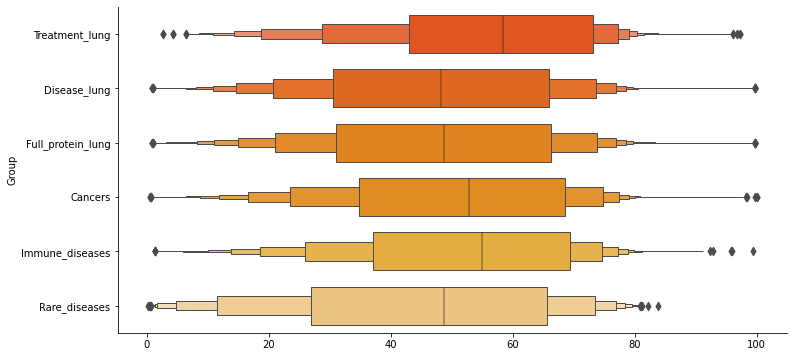

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores derivados del azul
my_colors = ["#ff4800", "#ff6000", "#ff8500", "#ff9100", "#ffb627", "#ffc971"]

# Configurar la paleta de colores
sns.set_palette(my_colors)

# Crear la figura
fig = plt.figure(figsize=(12, 6))

# Graficar el boxenplot
sns.boxenplot(x="SimilaridadAA", y="Group", data=groups, 
              width=0.7, order=["Treatment_lung", "Disease_lung", "Full_protein_lung", "Cancers","Immune_diseases","Rare_diseases"],
              showfliers=True)

# Personalizar ejes y eliminar despine
plt.xlabel("")
#plt.ylabel("Value Similarity_AA")
sns.despine()

# Guardar el gráfico como SVG
plt.savefig("plot_Test_6groups_SIMIAA_name.svg")

# Mostrar el gráfico
plt.show()
